In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
%matplotlib inline

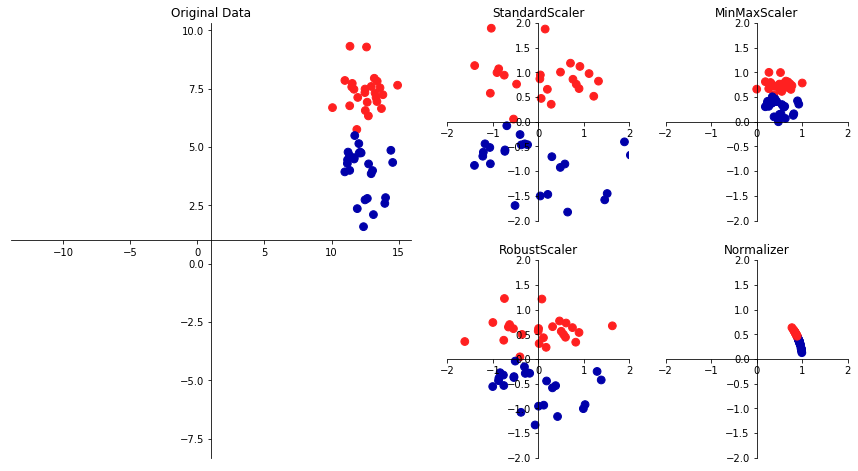

In [4]:
mglearn.plots.plot_scaling()

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
X_train_scaled = scaler.transform(X_train)

print('min before: {}'.format(X_train.min(axis=0)))
print('max before: {}'.format(X_train.max(axis=0)))
print('min after: {}'.format(X_train_scaled.min(axis=0)))
print('max after: {}'.format(X_train_scaled.max(axis=0)))

min before: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
max before: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
min after: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max after: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [9]:
X_test_scaled = scaler.transform(X_test)

print('min after: {}'.format(X_test_scaled.min(axis=0)))
print('max after: {}'.format(X_test_scaled.max(axis=0)))

min after: [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
max after: [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [10]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print('Правильность на тестовом наборе: {:.2f}'.format(svm.score(X_test, y_test)))

Правильность на тестовом наборе: 0.63


In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)

print('Правильность на масштабированном тестовом наборе: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Правильность на масштабированном тестовом наборе: 0.97


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)

print('Правильность SVM на тестовом наборе: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Правильность SVM на тестовом наборе: 0.96


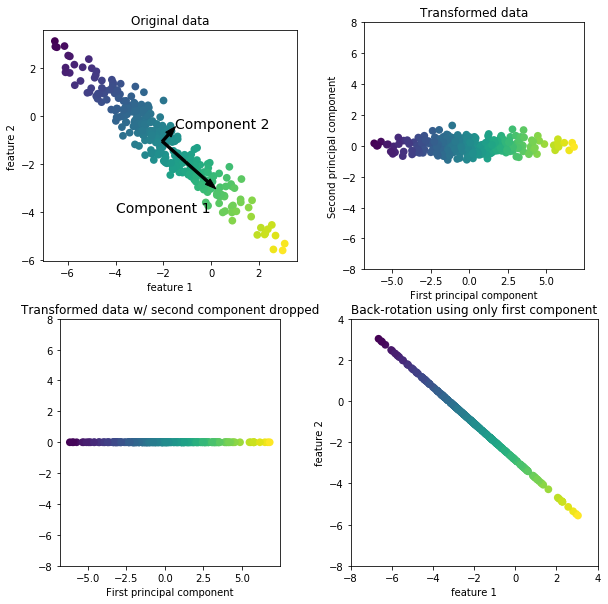

In [13]:
mglearn.plots.plot_pca_illustration()

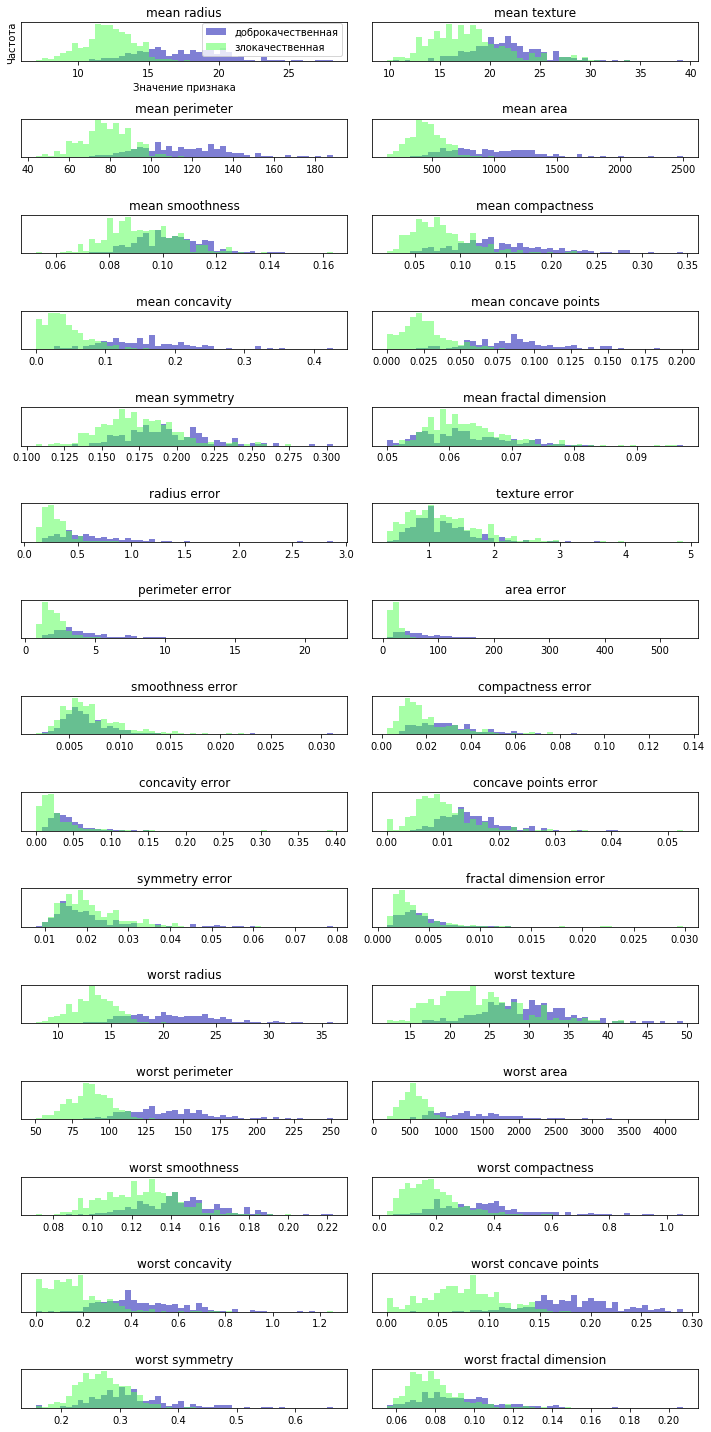

In [18]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel('Значение признака')
ax[0].set_ylabel('Частота')
ax[0].legend(['доброкачественная', 'злокачественная'], loc='best')
fig.tight_layout()

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('Форма исходного массива: {}'.format(str(X_scaled.shape)))
print('Форма после сокращения размерностей: {}'.format(str(X_pca.shape)))

Форма исходного массива: (569, 30)
Форма после сокращения размерностей: (569, 2)


Text(0,0.5,'Вторая главная компонента')

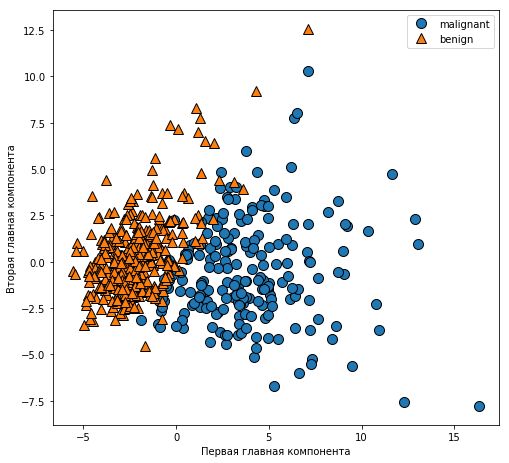

In [21]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')

In [24]:
print('Форма главных компонент: {}'.format(pca.components_.shape))
print('Компоненты PCA:\n{}'.format(pca.components_))

Форма главных компонент: (2, 30)
Компоненты PCA:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0,0.5,'Главные компоненты')

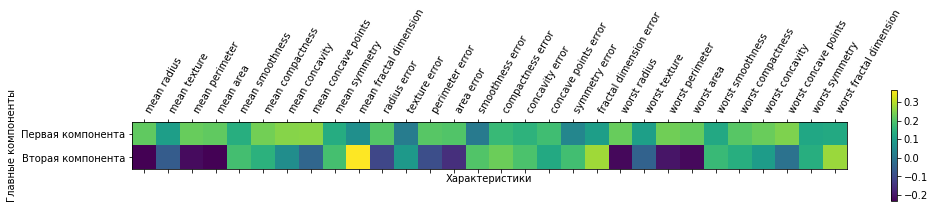

In [25]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['Первая компонента', 'Вторая компонента'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Характеристики')
plt.ylabel('Главные компоненты')